In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import GillespieSim as gs

In [150]:
lamp_2 = gs.ReactionModel(
                            species = {
                                            'in_primer_a': np.random.randint(990,1000),
                                            'ex_primer_a': np.random.randint(140, 150),
                                            'gene': np.random.randint(3,5),
                                            'amplicon': 0},

                            propensities = {
                                                'gene_c': 0.00039,
                                                'amplicon_c': 0.000185,
                                                'amplicon_amp': 0.0025,
                                                'gene_d': (np.log(2)/60),
                                                'amplicon_d': (np.log(2)/120)
                                                },

                            reactions = {
                                            'amplification':    ['gene_c',          'in_primer_a',  'gene'],
                                            'loop_amp':         ['amplicon_c',      'ex_primer_a',  'gene'],
                                            'amp_amp':          ['amplicon_amp',    'ex_primer_a',  'amplicon'],
                                            'gene_deg':         ['gene_d', 'gene'],
                                            'amplicon_deg':     ['amplicon_d', 'amplicon']
                                            },

                            q = {
                                    'amplification':    {'create': ['gene'],     'destroy': ['in_primer_a']},
                                    'loop_amp':         {'create': ['amplicon'], 'destroy': ['ex_primer_a', 'gene']},
                                    'amp_amp':          {'create': ['amplicon'], 'destroy': ['ex_primer_a']},
                                    'gene_deg' :        {'destroy': ['gene']},
                                    'amplicon_deg' :    {'destroy': ['amplicon']}
                                    }
                        )

In [4]:
LAMP = gs.Gillespie(tmax=60, sampling_time= 0.1, reaction_model=lamp_2, model_name='lamp_2', cells=3000)
LAMP.simulate()

NameError: name 'lamp_2' is not defined

In [3]:
df = pd.read_csv('lamp_2.csv', delimiter='|')

In [6]:
df.columns

Index(['in_primer_a', 'ex_primer_a', 'gene', 'amplicon', 'time', 'cell'], dtype='object')

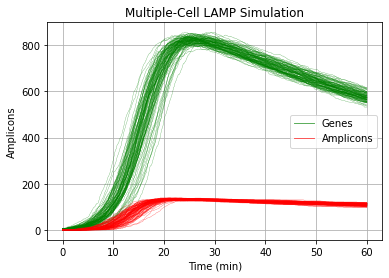

In [4]:
cells = len(df.cell.unique())
plt.plot(df.time[df.cell == 1],df.gene[df.cell == 1], 'g', lw=0.9, alpha=0.7, label='Genes');
[plt.plot(df.time[df.cell == cell],df.gene[df.cell == cell], 'g', lw=0.3, alpha=0.7) for cell in range(1,100)];

plt.plot(df.time[df.cell == 1],df.amplicon[df.cell == 1], 'r', lw=0.9, alpha=0.7, label='Amplicons');
[plt.plot(df.time[df.cell == cell],df.amplicon[df.cell == cell], 'r', lw=0.3, alpha=0.7) for cell in range(1,100)];

plt.grid(True)
plt.legend(loc=5)
plt.xlabel('Time (min)')
plt.ylabel('Amplicons')
plt.title('Multiple-Cell LAMP Simulation');
# plt.yscale('log')

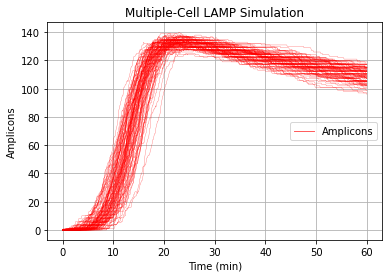

In [8]:
plt.plot(df.time[df.cell == 1],df.amplicon[df.cell == 1], 'r', lw=0.9, alpha=0.7, label='Amplicons');
[plt.plot(df.time[df.cell == cell],df.amplicon[df.cell == cell], 'r', lw=0.3, alpha=0.7) for cell in range(1,100)];
# plt.yscale('log')

plt.grid(True)
plt.legend(loc=5)
plt.xlabel('Time (min)')
plt.ylabel('Amplicons')
plt.title('Multiple-Cell LAMP Simulation');
# plt.yscale('log')

In [9]:
np.mean(df.amplicon[df.time == 1.1])

0.17766666666666667

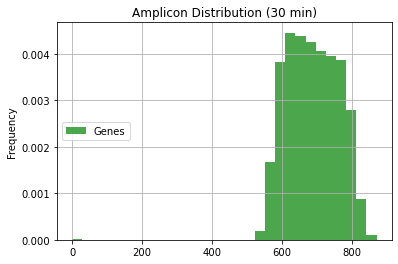

In [20]:
plt.hist(df.gene[df.time >= 30], bins=30, color='green', alpha=0.7, label='Genes', density=True);
plt.legend(loc=6)
plt.title('Amplicon Distribution (30 min)')

Text(0.5, 0, 'Number of Amplicons')

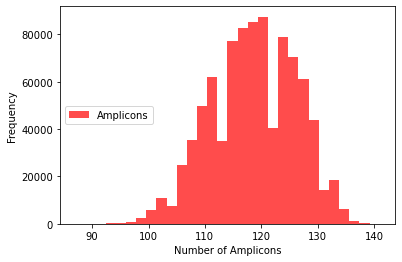

In [11]:
plt.hist(df.amplicon[df.time >= 30], bins=30, color='red', alpha=0.7, label='Amplicons');
plt.legend(loc=6)
plt.title('Amplicon Distribution (30 min)')

Text(0.5, 0, 'Number of Amplicons')

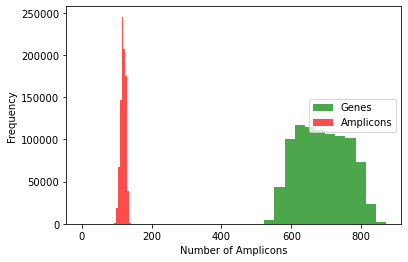

In [12]:
plt.hist(df.gene[df.time >= 30], bins=30, color='green', alpha=0.7, label='Genes');
plt.hist(df.amplicon[df.time >= 30], color='red', alpha=0.7, label='Amplicons');
plt.legend(loc=7)
plt.ylabel('Frequency')
plt.xlabel('Number of Amplicons')

In [13]:
u = 1927085280//9000
u//1800

118

In [14]:
dntps = 26798529675000
bst_pol = dntps//115
amplicon_len = 200

dntps_fl = dntps // 25000000
bst_pol_fl = bst_pol // 25000000

print(f'DNTPs per fl: {dntps_fl}')
print(f'Enzymes per fl: {bst_pol_fl}')

rate = dntps_fl// bst_pol_fl
print(f'Enzyme amplification rate is {rate} DNTPs per second')

# 1 amplicon --> 

bst_rate_30_mins = rate * 60 * 30
amplicons_per_min = (bst_rate_30_mins // amplicon_len) // 30
print(f'Amplicons per minute: {amplicons_per_min} Amplicons')

DNTPs per fl: 1071941
Enzymes per fl: 9321
Enzyme amplification rate is 115 DNTPs per second
Amplicons per minute: 34 Amplicons


In [15]:
rate*30*bst_pol_fl

32157450

In [16]:
48177132000000000//115

418931582608695

In [17]:
v = '48177132000000000'
len(v)

17

In [18]:
len('48236175000000000')

17